# Lab_4

In [47]:
import random
import math
import graphviz

In [48]:
g_cur_game = {
    'tree_height': 6,
    'players_num': 2,
    'strats_num': [3, 3],
    'min_cost': -20,
    'max_cost': 20
}

## Functions

In [62]:
class Edge:
    tag = None
    parent = None
    cost_array = []
    children = []
    path_last = None
    def __init__(self, parent, tag):
        self.parent = parent
        self.tag = tag
    def __repr__(self):
        out = "{}".format(self.tag)
        if self.parent:
            out = "{}({})".format(out, self.parent.tag)
        if self.cost_array:
            return "{}/{}\\".format(out, self.cost_array)
        return out

def generate_random_game_tree(cur_game):
    random.seed()
    edges = []
    cnt = 0
    for i in range(cur_game['tree_height']):
        if i == 0: # game just begins; add root
            edges.append([Edge(None, cnt)])
            cnt += 1
            continue
        cur_level = []
        prev_level = edges[i - 1]
        not_leaves = []
        not_leaves_len = random.choice(range(1, len(prev_level) + 1))
        for k in range(not_leaves_len):
            elem = random.choice(range(0, len(prev_level)))
            if elem not in not_leaves:
                not_leaves.append(elem)
        not_leaves.sort()
        for k in range(len(prev_level)):
            if k in not_leaves:
                children = []
                for _ in range(cur_game['strats_num'][(i - 1) % cur_game['players_num']]):
                    cur_edge = Edge(prev_level[k], cnt)
                    children.append(cur_edge)
                    cur_level.append(cur_edge)
                    cnt += 1
                prev_level[k].children = children
            else:
                prev_level[k].cost_array = random.choices(range(cur_game['min_cost'], cur_game['max_cost'] + 1), k = cur_game['players_num'])
                prev_level[k].path_last = prev_level[k]
        edges.append(cur_level)
    for cur_edge in edges[-1]:
        cur_edge.cost_array = random.choices(range(cur_game['min_cost'], cur_game['max_cost'] + 1), k = cur_game['players_num'])
        cur_edge.path_last = cur_edge
    return edges

def print_tree_by_level(tree, parents_tags, parent_child_map):
    dot = graphviz.Digraph()
    for edge in tree:
        for vertex in edge:
            label = '<<font color="green">{}</font>>'.format(str(vertex.cost_array))
            if vertex.tag in parents_tags:
                dot.node(str(vertex.tag), color='blue')
                dot.edge(str(parent_child_map[vertex.tag]), str(vertex.tag), arrowsize='2', color='green')
                dot.node(str(vertex.tag), xlabel = label)
            
            else: dot.node(str(vertex.tag), xlabel = str(vertex.cost_array) if len(vertex.cost_array) else '')
            if vertex.parent:
                dot.edge(str(vertex.parent.tag), str(vertex.tag))
    display(dot)
    
def print_best_path(tree, path, cost_array):
    dot = graphviz.Digraph()
    for edge in tree:
        for vertex in edge:
            if path and vertex.tag in path:
                dot.node(str(vertex.tag), color='green', style='filled')
                dot.node(str(vertex.tag), xlabel = str(cost_array))
            else: dot.node(str(vertex.tag))
            if vertex.parent:
                dot.edge(str(vertex.parent.tag), str(vertex.tag))
    display(dot)

def get_path(edge):
    path = []
    while edge.parent:
        path.append(edge.tag)
        edge = edge.parent
    path.append(edge.tag)
    return path[::-1]

def reverse_induction(tree, cur_game):
    print("Game strategies tree:")
    print_best_path(tree, None, None)

    for i in range(1, len(tree)):
        parents = []
        parents_and_children = {}
        parent_level = cur_game['tree_height'] - 1 - i
        for k in range(len(tree[parent_level])):
            parent = tree[parent_level][k]
            if parent.children:
                cur_max_strat = -math.inf
                best_child = parent.children[0]
                for cur_vertex_ind in range(len(parent.children)):
                    cur_vertex = parent.children[cur_vertex_ind]
                    if cur_vertex.cost_array[parent_level % cur_game['players_num']] > cur_max_strat:
                        best_child = cur_vertex
                        cur_max_strat = cur_vertex.cost_array[parent_level % cur_game['players_num']]
                        cur_player_strat = cur_vertex_ind
                parent.cost_array = parent.children[cur_player_strat].cost_array
                parent.path_last = parent.children[cur_player_strat].path_last
                parents.append(parent.tag)
                parents_and_children[parent.tag] = best_child.tag
        print("After {} step:".format(i))
        print_tree_by_level(tree, parents, parents_and_children)
    return tree[0][0]

def get_max_index(arr):
    return arr.index(max(arr))

## Main

Game strategies tree:


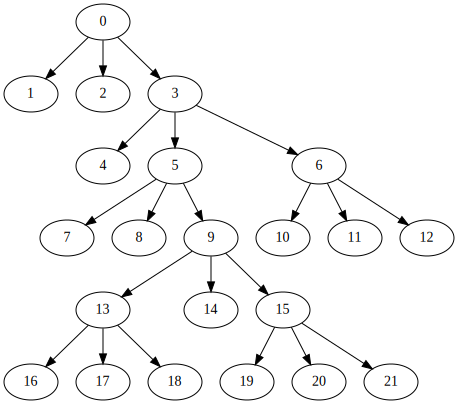

After 1 step:


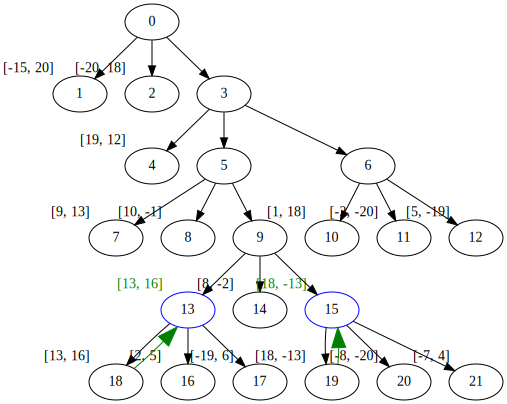

After 2 step:


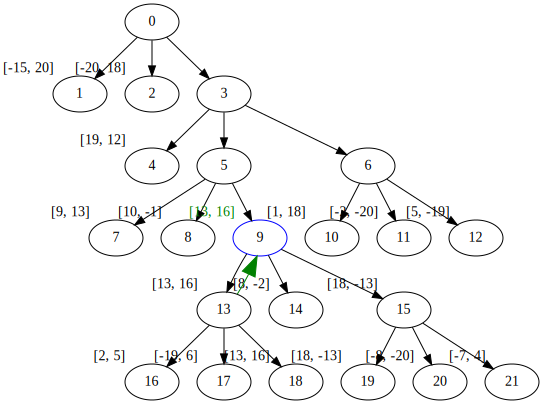

After 3 step:


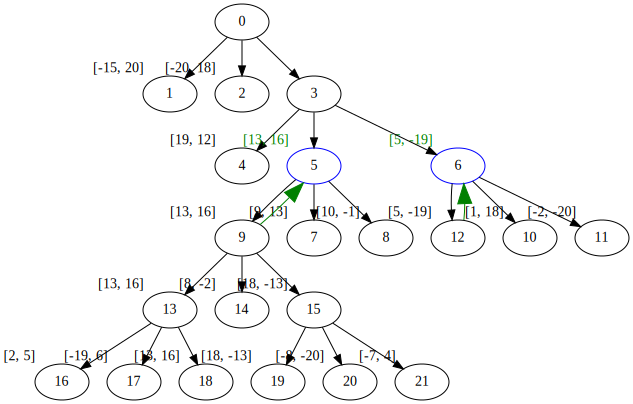

After 4 step:


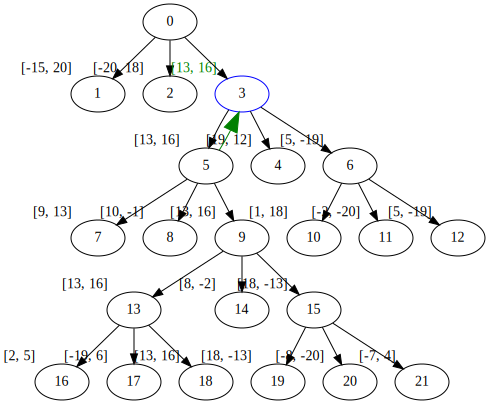

After 5 step:


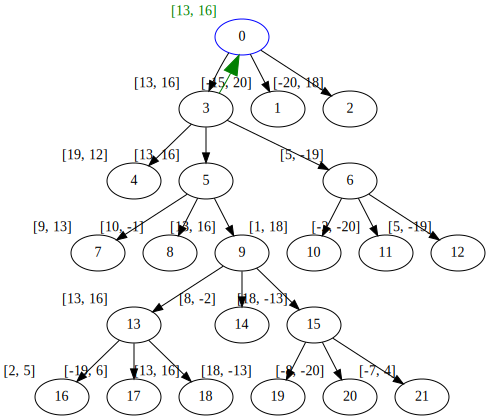

Game cost array: [13, 16]
Winner is 2 player (16)
Path is [0, 3, 5, 9, 13, 18]


In [65]:
tree = generate_random_game_tree(g_cur_game)
solution = reverse_induction(tree, g_cur_game)
path = get_path(solution.path_last)
print("Game cost array: {}".format(solution.cost_array))
print("Winner is {} player ({})".format(1 + get_max_index(solution.cost_array), max(solution.cost_array)))
print("Path is {}".format(path))
# print_best_path(tree, path, solution.cost_array)

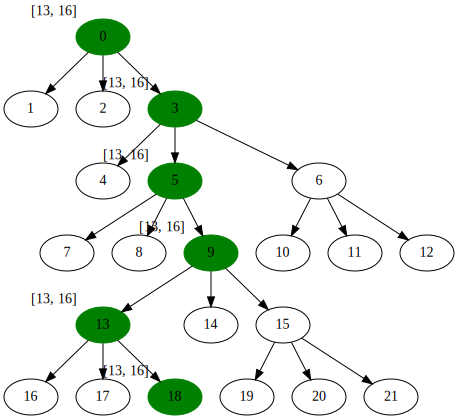

In [66]:
print_best_path(tree, path, solution.cost_array)